In [1]:
!pip install geopandas

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

## I. EDA
### 1. 인구현황 분석
목적: 격자 별 인구 현황을 확인

분석 데이터 종류

분석 설명

초록색일 수록 인구가 많이 있으며, 검은색일 수록 인구가 적으며, 색이 칠해지지 않은 곳은 인구 현황 값이 0 이다.
인구현황데이터는 현재 1kmX1km grid로 나누어져 있으나 추후 분석을 위해 grid의 중심에 해당하는 Point 값 (Central point)을 계산하였다.
따라서 인구 현황을 1kmX1km point로 설명 할 수 있는 결과를 도출하였다.

In [3]:
# 격자별 인구 현황
df_pop= gpd.read_file('/content/drive/MyDrive/KDT/H2/01, Data/04, 100X100인구격자/1KM_인구격자/(B100)국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_서울특별시_202104/nlsp_020001001.shp',encoding='utf8')

In [4]:
df_pop

,gid,lbl,val,geometry
0,다사6453,9486.00,9486.0,"POLYGON ((964000.000 1953000.000, 964000.000 1..."
1,다사5651,12646.00,12646.0,"POLYGON ((956000.000 1951000.000, 956000.000 1..."
2,다사6157,30514.00,30514.0,"POLYGON ((961000.000 1957000.000, 961000.000 1..."
3,다사5858,24530.00,24530.0,"POLYGON ((958000.000 1958000.000, 958000.000 1..."
4,다사5347,12016.00,12016.0,"POLYGON ((953000.000 1947000.000, 953000.000 1..."
...,...,...,...,...
705,다사4053,None,NaN,"POLYGON ((940000.000 1953000.000, 940000.000 1..."
706,다사7249,None,NaN,"POLYGON ((972000.000 1949000.000, 972000.000 1..."
707,다사4552,None,NaN,"POLYGON ((945000.000 1952000.000, 945000.000 1..."
708,다사6265,None,NaN,"POLYGON ((962000.000 1965000.000, 962000.000 1..."


In [5]:
df_pop = df_pop.to_crs(epsg=4329)
df_pop.head()

,gid,lbl,val,geometry
0,다사6453,9486.00,9486.0,"POLYGON ((127.09230 37.57567, 127.09225 37.584..."
1,다사5651,12646.00,12646.0,"POLYGON ((127.00183 37.55730, 127.00177 37.566..."
2,다사6157,30514.00,30514.0,"POLYGON ((127.05812 37.61161, 127.05806 37.620..."
3,다사5858,24530.00,24530.0,"POLYGON ((127.02407 37.62049, 127.02401 37.629..."
4,다사5347,12016.00,12016.0,"POLYGON ((126.96812 37.52110, 126.96805 37.530..."


In [6]:
# val 열 na 제거
df_pop['val'] = df_pop['val'].fillna(0)

In [7]:
# 인구 수 정규화
df_pop['nomalized_pop'] = df_pop['val'] / df_pop['val'].max()

In [8]:
#Pydeck 사용을 위한 함수 정의
def polygon_to_coordinates(x): 
    lon, lat = x.exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 

In [9]:
# geometry를 coordinate 형태로 적용
df_pop['coordinates'] = df_pop['geometry'].apply(polygon_to_coordinates) #pydeck 을 위한 coordinate type

In [10]:
df_pop

,gid,lbl,val,geometry,nomalized_pop,coordinates
0,다사6453,9486.00,9486.0,"POLYGON ((127.09230 37.57567, 127.09225 37.584...",0.206811,"[[127.0923035430468, 37.57567440305103], [127...."
1,다사5651,12646.00,12646.0,"POLYGON ((127.00183 37.55730, 127.00177 37.566...",0.275704,"[[127.00182724968018, 37.55730030462514], [127..."
2,다사6157,30514.00,30514.0,"POLYGON ((127.05812 37.61161, 127.05806 37.620...",0.665257,"[[127.0581165973122, 37.61160520068249], [127...."
3,다사5858,24530.00,24530.0,"POLYGON ((127.02407 37.62049, 127.02401 37.629...",0.534796,"[[127.02406915802318, 37.62048620853416], [127..."
4,다사5347,12016.00,12016.0,"POLYGON ((126.96812 37.52110, 126.96805 37.530...",0.261969,"[[126.96811838272411, 37.52109923832573], [126..."
...,...,...,...,...,...,...
705,다사4053,None,0.0,"POLYGON ((126.82052 37.57442, 126.82044 37.583...",0.000000,"[[126.82051991631344, 37.57442288713654], [126..."
706,다사7249,None,0.0,"POLYGON ((127.18305 37.53990, 127.18302 37.548...",0.000000,"[[127.18305405081533, 37.539898769520654], [12..."
707,다사4552,None,0.0,"POLYGON ((126.87722 37.56572, 126.87714 37.574...",0.000000,"[[126.87721510590382, 37.565722190145515], [12..."
708,다사6265,None,0.0,"POLYGON ((127.06903 37.68375, 127.06898 37.692...",0.000000,"[[127.0690301996547, 37.683752563572355], [127..."


In [11]:
# 100X100 grid에서 central point 찾기
df_pop_list = []
df_pop_list2 = []
for i in df_pop['geometry']:
    cent = [[i.centroid.coords[0][0],i.centroid.coords[0][1]]]
    df_pop_list.append(cent)
    df_pop_list2.append(i.centroid)
df_pop['coord_cent'] = 0
df_pop['geo_cent'] = 0
df_pop['coord_cent']= pd.DataFrame(df_pop_list) # pydeck을 위한 coordinate type
df_pop['geo_cent'] = df_pop_list2 # geopandas를 위한 geometry type

In [12]:
df_pop

,gid,lbl,val,geometry,nomalized_pop,coordinates,coord_cent,geo_cent
0,다사6453,9486.00,9486.0,"POLYGON ((127.09230 37.57567, 127.09225 37.584...",0.206811,"[[127.0923035430468, 37.57567440305103], [127....","[127.09794163380136, 37.58020043829302]",POINT (127.0979416338014 37.58020043829302)
1,다사5651,12646.00,12646.0,"POLYGON ((127.00183 37.55730, 127.00177 37.566...",0.275704,"[[127.00182724968018, 37.55730030462514], [127...","[127.00745844605304, 37.561830628142914]",POINT (127.007458446053 37.56183062814291)
2,다사6157,30514.00,30514.0,"POLYGON ((127.05812 37.61161, 127.05806 37.620...",0.665257,"[[127.0581165973122, 37.61160520068249], [127....","[127.06375529184683, 37.61613284538466]",POINT (127.0637552918468 37.61613284538466)
3,다사5858,24530.00,24530.0,"POLYGON ((127.02407 37.62049, 127.02401 37.629...",0.534796,"[[127.02406915802318, 37.62048620853416], [127...","[127.0297064357866, 37.625015464100706]",POINT (127.0297064357866 37.62501546410071)
4,다사5347,12016.00,12016.0,"POLYGON ((126.96812 37.52110, 126.96805 37.530...",0.261969,"[[126.96811838272411, 37.52109923832573], [126...","[126.97374482409313, 37.52563116149439]",POINT (126.9737448240931 37.52563116149439)
...,...,...,...,...,...,...,...,...
705,다사4053,None,0.0,"POLYGON ((126.82052 37.57442, 126.82044 37.583...",0.000000,"[[126.82051991631344, 37.57442288713654], [126...","[126.82614128007928, 37.57896175706814]",POINT (126.8261412800793 37.57896175706814)
706,다사7249,None,0.0,"POLYGON ((127.18305 37.53990, 127.18302 37.548...",0.000000,"[[127.18305405081533, 37.539898769520654], [12...","[127.18869498499079, 37.544420511791216]",POINT (127.1886949849908 37.54442051179122)
707,다사4552,None,0.0,"POLYGON ((126.87722 37.56572, 126.87714 37.574...",0.000000,"[[126.87721510590382, 37.565722190145515], [12...","[126.88283930295496, 37.57025839209927]",POINT (126.882839302955 37.57025839209927)
708,다사6265,None,0.0,"POLYGON ((127.06903 37.68375, 127.06898 37.692...",0.000000,"[[127.0690301996547, 37.683752563572355], [127...","[127.0746749769675, 37.688279668672436]",POINT (127.0746749769675 37.68827966867244)


In [13]:
# 인구 현황이 가장 높은 위치
df_pop.iloc[df_pop["val"].sort_values(ascending=False).index].reindex().head()

,gid,lbl,val,geometry,nomalized_pop,coordinates,coord_cent,geo_cent
423,다사6748,45868.00,45868.0,"POLYGON ((127.12650 37.53072, 127.12646 37.539...",1.000000,"[[127.126502533738, 37.53071988230903], [127.1...","[127.13213934415279, 37.535244311861085]",POINT (127.1321393441528 37.53524431186109)
38,다사4248,44816.00,44816.0,"POLYGON ((126.84356 37.52949, 126.84348 37.538...",0.977065,"[[126.84356325014052, 37.52948610877284], [126...","[126.84918269396793, 37.534023897319116]",POINT (126.8491826939679 37.53402389731912)
559,다사4853,44374.00,44374.0,"POLYGON ((126.91111 37.57491, 126.91104 37.583...",0.967428,"[[126.91111253861166, 37.574909578300165], [12...","[126.91673949704622, 37.57944418152746]",POINT (126.9167394970462 37.57944418152746)
168,다사4856,42797.00,42797.0,"POLYGON ((126.91090 37.60195, 126.91083 37.610...",0.933047,"[[126.91089946451756, 37.60194873994623], [126...","[126.91652842434452, 37.60648334954957]",POINT (126.9165284243445 37.60648334954957)
205,다사5756,41801.00,41801.0,"POLYGON ((127.01286 37.60241, 127.01280 37.611...",0.911333,"[[127.01285544099093, 37.60241362270109], [127...","[127.01849068052607, 37.60694341377813]",POINT (127.0184906805261 37.60694341377813)


In [14]:
pip install pydeck

In [15]:
#from geoband import API

import pydeck as pdk
import os

In [16]:
# Make layer
# 사람이 있는 그리드만 추출
layer = pdk.Layer('PolygonLayer', # 사용할 Layer 타입 
                  df_pop[(df_pop['val'].isnull()==False) & df_pop['val']!=0], # 시각화에 쓰일 데이터프레임 
                  get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름 
                  get_fill_color='[0, 255*정규화인구, 0, 정규화인구*10000 ]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
                  pickable=True, # 지도와 interactive 한 동작 on 
                  auto_highlight=True # 마우스 오버(hover) 시 박스 출력 
                 ) 

# Set the viewport location 
center = [127.0076, 37.5437] 
view_state = pdk.ViewState( 
    longitude=center[0], 
    latitude=center[1], 
    zoom=10
) 

# Render 
# r = pdk.Deck(layers=[layer], initial_view_state=view_state,
#              map_style='mapbox://styles/mapbox/outdoors-v11',
#              mapbox_key = MAPBBOX_API_KEY 
            # )

# r.to_html()


r = pdk.Deck(layers= [layer], initial_view_state=view_state, 
             api_keys = {'mapbox' : "pk.eyJ1IjoiYXJldW1rbyIsImEiOiJja3N6ZnFyYjUyY2xuMzBwanFsajRwcWV3In0.L28DvER-WHnFKwaJwxNgLA"},
             map_style='road')

r.to_html()

<IPython.core.display.Javascript object>

'<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n    <title>pydeck</title>\n        <script src="https://api.tiles.mapbox.com/mapbox-gl-js/v1.13.0/mapbox-gl.js"></script>\n        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css" />\n    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css" />\n    <script src=\'https://cdn.jsdelivr.net/npm/@deck.gl/jupyter-widget@~8.5.*/dist/index.js\'></script>\n    <style>\n    body {\n  margin: 0;\n  padding: 0;\n  overflow: hidden;\n}\n\n#deck-map-container {\n  width: 100%;\n  height: 100%;\n  background-color: black;\n}\n\n#map {\n  pointer-events: none;\n  height: 100%;\n  width: 100%;\n  position: absolute;\n  z-index: 1;\n}\n\n#deckgl-overlay {\n  z-index: 2;\n  background: none;\n}\n\n#deck-map-wrapper {\n  width: 100%;\n  height: 100%;\n}\n\n#deck-container {\n  width: 100v

###2. 자동차 등록 대수 분석
목적: 어느 지역이 가장 많은 자동차가 등록 되어있는지 분석

분석 설명

분석 시간 단축을 위해 차량이 1대 이상 등록된 곳만 필터링 하였다.
초록색에 가까울 수록 차량이 많이 등록 되었다는 것을 의미하며, 검은색은 초록색에 비해 적게 등록되어있음을 의미한다. 그리드가 없는 곳은 차량이 1대 또는 등록이 되지 않은 곳이다.

지역 geometry 정보를 함께 통합하였다.

In [17]:
# 자동차 등록
df_car = pd.read_excel("/content/drive/MyDrive/KDT/H2/01, Data/05, 자동차등록현황/'21년 1월 기준 서울시 자동차 등록현황(동별, 연료별).xlsx", header =1)
df_car

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(유연),휘발유(무연),CNG,하이브리드\n(휘발유+전기),하이브리드\n(경유+전기),하이브리드\n(LPG+전기),하이브리드\n(CNG+전기),수소,기타연료
0,서울특별시 종로구 청운동,800,220.0,259.0,32.0,4.0,1.0,243.0,NaN,38.0,NaN,1.0,NaN,NaN,2.0
1,서울특별시 종로구 신교동,383,87.0,141.0,28.0,3.0,NaN,111.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN
2,서울특별시 종로구 궁정동,47,10.0,16.0,1.0,NaN,NaN,14.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
3,서울특별시 종로구 효자동,175,55.0,68.0,4.0,1.0,NaN,39.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
4,서울특별시 종로구 창성동,165,41.0,66.0,4.0,1.0,NaN,46.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,서울특별시 강동구 둔촌동,8886,1789.0,3108.0,931.0,32.0,NaN,2697.0,3.0,306.0,1.0,3.0,NaN,4.0,12.0
467,서울특별시 강동구 암사동,21898,4452.0,7495.0,2025.0,62.0,9.0,6940.0,6.0,838.0,9.0,11.0,NaN,11.0,40.0
468,서울특별시 강동구 성내동,22144,4070.0,8188.0,2244.0,122.0,13.0,6723.0,14.0,697.0,3.0,6.0,NaN,20.0,44.0
469,서울특별시 강동구 천호동,26161,4950.0,9888.0,2664.0,79.0,13.0,7730.0,5.0,738.0,4.0,9.0,NaN,21.0,60.0


In [18]:
df_car.columns

Index(['사용본거지법정동명', '동별 총 대수', '휘발유', '경유', '엘피지', '전기', '휘발유(유연)', '휘발유(무연)',
       'CNG', '하이브리드\n(휘발유+전기)', '하이브리드\n(경유+전기)', '하이브리드\n(LPG+전기)',
       '하이브리드\n(CNG+전기)', '수소', '기타연료'],
      dtype='object')

In [19]:
df_car = df_car.drop(['휘발유', '경유', '엘피지', '전기', '휘발유(유연)', '휘발유(무연)',
       'CNG', '하이브리드\n(휘발유+전기)', '하이브리드\n(경유+전기)', '하이브리드\n(LPG+전기)',
       '하이브리드\n(CNG+전기)', '수소', '기타연료'], axis =1)
df_car

,사용본거지법정동명,동별 총 대수
0,서울특별시 종로구 청운동,800
1,서울특별시 종로구 신교동,383
2,서울특별시 종로구 궁정동,47
3,서울특별시 종로구 효자동,175
4,서울특별시 종로구 창성동,165
...,...,...
466,서울특별시 강동구 둔촌동,8886
467,서울특별시 강동구 암사동,21898
468,서울특별시 강동구 성내동,22144
469,서울특별시 강동구 천호동,26161


In [20]:
df_car_split = df_car['사용본거지법정동명'].str.split(' ')
df_car['동'] = df_car_split.str.get(2)

In [21]:
df_car

,사용본거지법정동명,동별 총 대수,동
0,서울특별시 종로구 청운동,800,청운동
1,서울특별시 종로구 신교동,383,신교동
2,서울특별시 종로구 궁정동,47,궁정동
3,서울특별시 종로구 효자동,175,효자동
4,서울특별시 종로구 창성동,165,창성동
...,...,...,...
466,서울특별시 강동구 둔촌동,8886,둔촌동
467,서울특별시 강동구 암사동,21898,암사동
468,서울특별시 강동구 성내동,22144,성내동
469,서울특별시 강동구 천호동,26161,천호동


서울시 행정동 경계선 vs. 서울시 자동차 등록현황 비교결과


서울시 행정구 경계선 지도에 노유동, 도동1가, 포이동, 학동 정보가 없음 
따라서 서울시 자동차 등록현황에서 노유동, 도동1가, 포이동, 학동을 제외
[참고](https://www.notion.so/vs-24ac7537ae7c4c4490d06ef0fe3ae69d)

In [22]:
df_car_nondup = df_car['동'].isin(['노유동', '도동1가', '포이동', '학동'])
df_car = df_car[~df_car_nondup]
df_car

,사용본거지법정동명,동별 총 대수,동
0,서울특별시 종로구 청운동,800,청운동
1,서울특별시 종로구 신교동,383,신교동
2,서울특별시 종로구 궁정동,47,궁정동
3,서울특별시 종로구 효자동,175,효자동
4,서울특별시 종로구 창성동,165,창성동
...,...,...,...
466,서울특별시 강동구 둔촌동,8886,둔촌동
467,서울특별시 강동구 암사동,21898,암사동
468,서울특별시 강동구 성내동,22144,성내동
469,서울특별시 강동구 천호동,26161,천호동


In [23]:
df_car_sort = df_car.sort_values(by=['동'])
df_car_sort = df_car_sort.reset_index(drop=True)
df_car_sort

,사용본거지법정동명,동별 총 대수,동
0,서울특별시 송파구 가락동,35063,가락동
1,서울특별시 구로구 가리봉동,2800,가리봉동
2,서울특별시 금천구 가산동,19894,가산동
3,서울특별시 강서구 가양동,24971,가양동
4,서울특별시 종로구 가회동,289,가회동
...,...,...,...
462,서울특별시 용산구 후암동,4046,후암동
463,서울특별시 종로구 훈정동,1,훈정동
464,서울특별시 동대문구 휘경동,10170,휘경동
465,서울특별시 동작구 흑석동,9121,흑석동


In [24]:
# 서울시 행정경계
df_map= gpd.read_file('/content/drive/MyDrive/KDT/H2/01, Data/06,서울시 행정경계_읍면동/02, 서울/LSMD_ADM_SECT_UMD_서울/LSMD_ADM_SECT_UMD_11.shp',encoding='cp949')

In [25]:
df_map = df_map.to_crs(epsg=4329)
df_map

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11110131,권농동,328,11110,3033,"POLYGON ((126.99279 37.57756, 126.99281 37.577..."
1,11110145,송현동,327,11110,3034,"POLYGON ((126.98212 37.57863, 126.98212 37.578..."
2,11110115,사직동,326,11110,3035,"POLYGON ((126.96483 37.57818, 126.96498 37.578..."
3,11110113,필운동,325,11110,3036,"POLYGON ((126.96985 37.57846, 126.96988 37.578..."
4,11110165,이화동,324,11110,3037,"POLYGON ((127.00805 37.57920, 127.00805 37.579..."
...,...,...,...,...,...,...
462,11650106,잠원동,49,11650,2663,"POLYGON ((126.99743 37.51736, 126.99786 37.517..."
463,11620101,봉천동,370,11620,2664,"POLYGON ((126.96661 37.45607, 126.96596 37.455..."
464,11620102,신림동,369,11620,2665,"POLYGON ((126.92416 37.48996, 126.92437 37.489..."
465,11620103,남현동,35,11620,2666,"POLYGON ((126.96661 37.45607, 126.96668 37.456..."


In [26]:
df_map_sort = df_map.sort_values(by=['EMD_NM'])
df_map_sort = df_map_sort.reset_index(drop=True)
df_map_sort

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11710107,가락동,56,11710,2632,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,11530103,가리봉동,386,11530,2715,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,11545101,가산동,34,11545,2711,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,11500104,가양동,66,11500,2735,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,11110146,가회동,306,11110,3061,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...,...,...
462,11170101,후암동,154,11170,2901,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,11110150,훈정동,332,11110,3049,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,11230109,휘경동,498,11230,2859,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,11590105,흑석동,54,11590,2671,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [27]:
df_car_map = pd.concat([df_car_sort, df_map_sort],axis=1)
df_car_map

,사용본거지법정동명,동별 총 대수,동,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,서울특별시 송파구 가락동,35063,가락동,11710107,가락동,56,11710,2632,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,2800,가리봉동,11530103,가리봉동,386,11530,2715,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,19894,가산동,11545101,가산동,34,11545,2711,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,24971,가양동,11500104,가양동,66,11500,2735,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,289,가회동,11110146,가회동,306,11110,3061,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...,...,...,...,...,...
462,서울특별시 용산구 후암동,4046,후암동,11170101,후암동,154,11170,2901,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,1,훈정동,11110150,훈정동,332,11110,3049,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,10170,휘경동,11230109,휘경동,498,11230,2859,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,9121,흑석동,11590105,흑석동,54,11590,2671,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [28]:
# df_car_map.to_excel('compare.xlsx') # 동 같은지 비교하기 위해 excel로 추출하여 확인
# 확인 결과 동일

In [29]:
df_car_map.columns

Index(['사용본거지법정동명', '동별 총 대수', '동', 'EMD_CD', 'EMD_NM', 'SGG_OID',
       'COL_ADM_SE', 'GID', 'geometry'],
      dtype='object')

In [30]:
df_car_map = df_car_map.drop(['EMD_CD', 'EMD_NM', 'SGG_OID', 'COL_ADM_SE', 'GID'], axis =1)
df_car_map

,사용본거지법정동명,동별 총 대수,동,geometry
0,서울특별시 송파구 가락동,35063,가락동,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,2800,가리봉동,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,19894,가산동,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,24971,가양동,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,289,가회동,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...
462,서울특별시 용산구 후암동,4046,후암동,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,1,훈정동,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,10170,휘경동,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,9121,흑석동,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [31]:
df_car_map.columns

Index(['사용본거지법정동명', '동별 총 대수', '동', 'geometry'], dtype='object')

In [32]:
df_car_map = df_car_map[['사용본거지법정동명', '동', '동별 총 대수', 'geometry']]
df_car_map

,사용본거지법정동명,동,동별 총 대수,geometry
0,서울특별시 송파구 가락동,가락동,35063,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,가리봉동,2800,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,가산동,19894,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,가양동,24971,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,가회동,289,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...
462,서울특별시 용산구 후암동,후암동,4046,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,훈정동,1,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,휘경동,10170,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,흑석동,9121,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


## II. 입지선정지수 개발

###1. 100X100 Point에 전기 자동차등록현황 부여
목적: 자동차등록대수 만큼 값을 부여

**분석 데이터 종류**

df_car: '21년 1월 기준 서울시 자동차 등록현황(동별, 연료별).xlsx
df_map: LSMD_ADM_SECT_UMD_11.shp


**분석 설명**

자동차등록현황을 point에 대입함

각 지역에 해당하는 Point를 모두 추출, 자동차등록현황을 부여하였다.

In [33]:
df_pop

,gid,lbl,val,geometry,nomalized_pop,coordinates,coord_cent,geo_cent
0,다사6453,9486.00,9486.0,"POLYGON ((127.09230 37.57567, 127.09225 37.584...",0.206811,"[[127.0923035430468, 37.57567440305103], [127....","[127.09794163380136, 37.58020043829302]",POINT (127.0979416338014 37.58020043829302)
1,다사5651,12646.00,12646.0,"POLYGON ((127.00183 37.55730, 127.00177 37.566...",0.275704,"[[127.00182724968018, 37.55730030462514], [127...","[127.00745844605304, 37.561830628142914]",POINT (127.007458446053 37.56183062814291)
2,다사6157,30514.00,30514.0,"POLYGON ((127.05812 37.61161, 127.05806 37.620...",0.665257,"[[127.0581165973122, 37.61160520068249], [127....","[127.06375529184683, 37.61613284538466]",POINT (127.0637552918468 37.61613284538466)
3,다사5858,24530.00,24530.0,"POLYGON ((127.02407 37.62049, 127.02401 37.629...",0.534796,"[[127.02406915802318, 37.62048620853416], [127...","[127.0297064357866, 37.625015464100706]",POINT (127.0297064357866 37.62501546410071)
4,다사5347,12016.00,12016.0,"POLYGON ((126.96812 37.52110, 126.96805 37.530...",0.261969,"[[126.96811838272411, 37.52109923832573], [126...","[126.97374482409313, 37.52563116149439]",POINT (126.9737448240931 37.52563116149439)
...,...,...,...,...,...,...,...,...
705,다사4053,None,0.0,"POLYGON ((126.82052 37.57442, 126.82044 37.583...",0.000000,"[[126.82051991631344, 37.57442288713654], [126...","[126.82614128007928, 37.57896175706814]",POINT (126.8261412800793 37.57896175706814)
706,다사7249,None,0.0,"POLYGON ((127.18305 37.53990, 127.18302 37.548...",0.000000,"[[127.18305405081533, 37.539898769520654], [12...","[127.18869498499079, 37.544420511791216]",POINT (127.1886949849908 37.54442051179122)
707,다사4552,None,0.0,"POLYGON ((126.87722 37.56572, 126.87714 37.574...",0.000000,"[[126.87721510590382, 37.565722190145515], [12...","[126.88283930295496, 37.57025839209927]",POINT (126.882839302955 37.57025839209927)
708,다사6265,None,0.0,"POLYGON ((127.06903 37.68375, 127.06898 37.692...",0.000000,"[[127.0690301996547, 37.683752563572355], [127...","[127.0746749769675, 37.688279668672436]",POINT (127.0746749769675 37.68827966867244)


In [34]:
df_reg = df_pop[['gid','geometry','coordinates','coord_cent','geo_cent','nomalized_pop']]
df_reg

,gid,geometry,coordinates,coord_cent,geo_cent,nomalized_pop
0,다사6453,"POLYGON ((127.09230 37.57567, 127.09225 37.584...","[[127.0923035430468, 37.57567440305103], [127....","[127.09794163380136, 37.58020043829302]",POINT (127.0979416338014 37.58020043829302),0.206811
1,다사5651,"POLYGON ((127.00183 37.55730, 127.00177 37.566...","[[127.00182724968018, 37.55730030462514], [127...","[127.00745844605304, 37.561830628142914]",POINT (127.007458446053 37.56183062814291),0.275704
2,다사6157,"POLYGON ((127.05812 37.61161, 127.05806 37.620...","[[127.0581165973122, 37.61160520068249], [127....","[127.06375529184683, 37.61613284538466]",POINT (127.0637552918468 37.61613284538466),0.665257
3,다사5858,"POLYGON ((127.02407 37.62049, 127.02401 37.629...","[[127.02406915802318, 37.62048620853416], [127...","[127.0297064357866, 37.625015464100706]",POINT (127.0297064357866 37.62501546410071),0.534796
4,다사5347,"POLYGON ((126.96812 37.52110, 126.96805 37.530...","[[126.96811838272411, 37.52109923832573], [126...","[126.97374482409313, 37.52563116149439]",POINT (126.9737448240931 37.52563116149439),0.261969
...,...,...,...,...,...,...
705,다사4053,"POLYGON ((126.82052 37.57442, 126.82044 37.583...","[[126.82051991631344, 37.57442288713654], [126...","[126.82614128007928, 37.57896175706814]",POINT (126.8261412800793 37.57896175706814),0.000000
706,다사7249,"POLYGON ((127.18305 37.53990, 127.18302 37.548...","[[127.18305405081533, 37.539898769520654], [12...","[127.18869498499079, 37.544420511791216]",POINT (127.1886949849908 37.54442051179122),0.000000
707,다사4552,"POLYGON ((126.87722 37.56572, 126.87714 37.574...","[[126.87721510590382, 37.565722190145515], [12...","[126.88283930295496, 37.57025839209927]",POINT (126.882839302955 37.57025839209927),0.000000
708,다사6265,"POLYGON ((127.06903 37.68375, 127.06898 37.692...","[[127.0690301996547, 37.683752563572355], [127...","[127.0746749769675, 37.688279668672436]",POINT (127.0746749769675 37.68827966867244),0.000000


In [35]:
point_cent= gpd.GeoDataFrame(df_reg[['gid','geo_cent']],geometry = 'geo_cent')
point_cent

,gid,geo_cent
0,다사6453,POINT (127.09794 37.58020)
1,다사5651,POINT (127.00746 37.56183)
2,다사6157,POINT (127.06376 37.61613)
3,다사5858,POINT (127.02971 37.62502)
4,다사5347,POINT (126.97374 37.52563)
...,...,...
705,다사4053,POINT (126.82614 37.57896)
706,다사7249,POINT (127.18869 37.54442)
707,다사4552,POINT (126.88284 37.57026)
708,다사6265,POINT (127.07467 37.68828)


In [36]:
from tqdm.notebook import tqdm

In [37]:
car_points = []
for i in tqdm(range(len(df_car_map))):
    car_points.append([df_car_map.loc[i,'동별 총 대수'],
                        point_cent.buffer(0.00000001).within(df_car_map.loc[i,'geometry'])])
    
df_reg['자동차등록'] = 0

for i in range(len(car_points)):
    df_reg['자동차등록'][car_points[i][1]] = car_points[i][0]
    
df_reg

  0%|          | 0/467 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,gid,geometry,coordinates,coord_cent,geo_cent,nomalized_pop,자동차등록
0,다사6453,"POLYGON ((127.09230 37.57567, 127.09225 37.584...","[[127.0923035430468, 37.57567440305103], [127....","[127.09794163380136, 37.58020043829302]",POINT (127.0979416338014 37.58020043829302),0.206811,37518
1,다사5651,"POLYGON ((127.00183 37.55730, 127.00177 37.566...","[[127.00182724968018, 37.55730030462514], [127...","[127.00745844605304, 37.561830628142914]",POINT (127.007458446053 37.56183062814291),0.275704,557
2,다사6157,"POLYGON ((127.05812 37.61161, 127.05806 37.620...","[[127.0581165973122, 37.61160520068249], [127....","[127.06375529184683, 37.61613284538466]",POINT (127.0637552918468 37.61613284538466),0.665257,23820
3,다사5858,"POLYGON ((127.02407 37.62049, 127.02401 37.629...","[[127.02406915802318, 37.62048620853416], [127...","[127.0297064357866, 37.625015464100706]",POINT (127.0297064357866 37.62501546410071),0.534796,33164
4,다사5347,"POLYGON ((126.96812 37.52110, 126.96805 37.530...","[[126.96811838272411, 37.52109923832573], [126...","[126.97374482409313, 37.52563116149439]",POINT (126.9737448240931 37.52563116149439),0.261969,1035
...,...,...,...,...,...,...,...
705,다사4053,"POLYGON ((126.82052 37.57442, 126.82044 37.583...","[[126.82051991631344, 37.57442288713654], [126...","[126.82614128007928, 37.57896175706814]",POINT (126.8261412800793 37.57896175706814),0.000000,23499
706,다사7249,"POLYGON ((127.18305 37.53990, 127.18302 37.548...","[[127.18305405081533, 37.539898769520654], [12...","[127.18869498499079, 37.544420511791216]",POINT (127.1886949849908 37.54442051179122),0.000000,0
707,다사4552,"POLYGON ((126.87722 37.56572, 126.87714 37.574...","[[126.87721510590382, 37.565722190145515], [12...","[126.88283930295496, 37.57025839209927]",POINT (126.882839302955 37.57025839209927),0.000000,11428
708,다사6265,"POLYGON ((127.06903 37.68375, 127.06898 37.692...","[[127.0690301996547, 37.683752563572355], [127...","[127.0746749769675, 37.688279668672436]",POINT (127.0746749769675 37.68827966867244),0.000000,60633


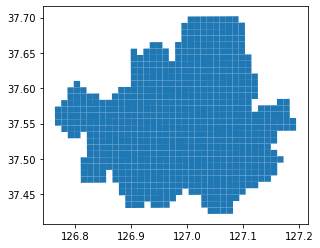

In [38]:
df_reg['geometry'].plot()

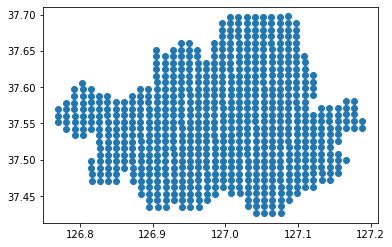

In [39]:
point_cent.plot()

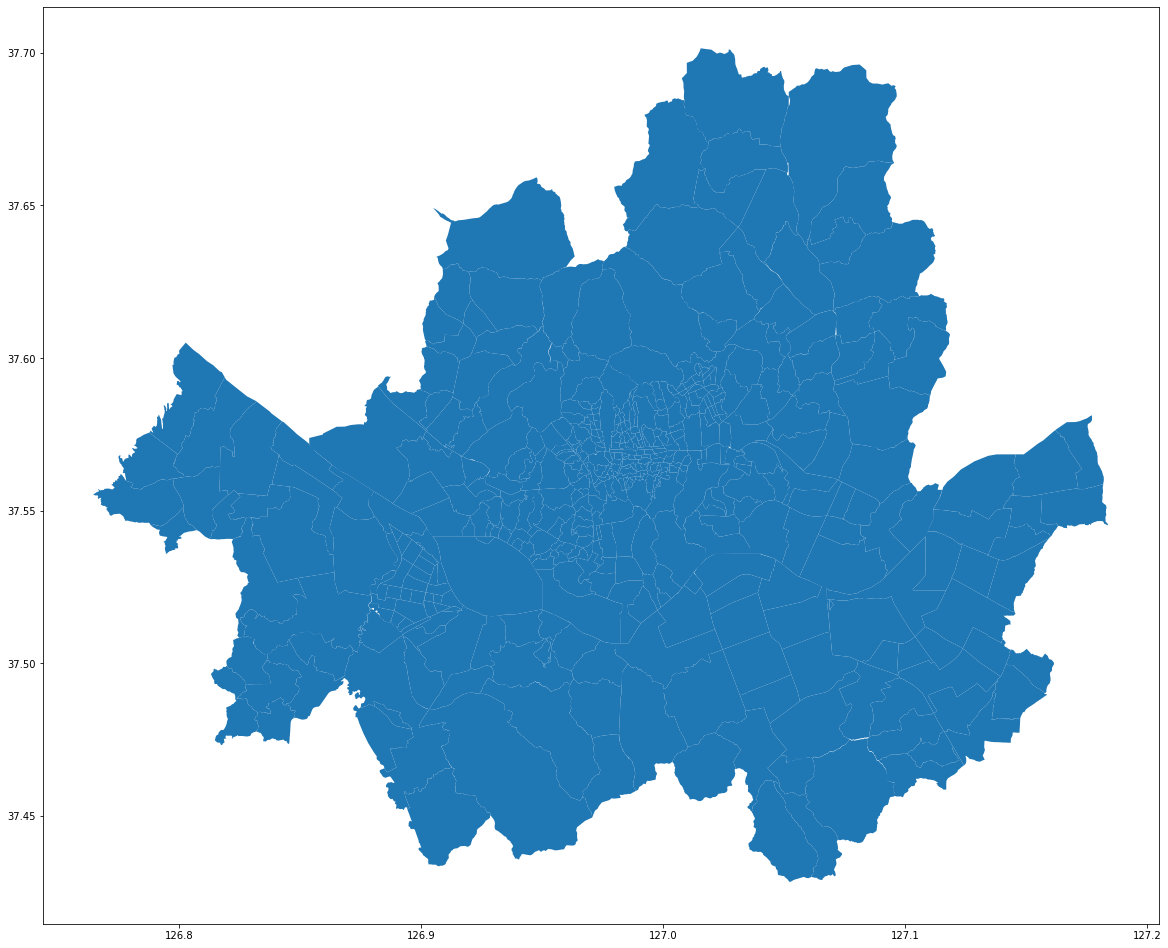

In [40]:
df_map.plot(figsize=(20,20))

In [41]:
import matplotlib.pyplot as plt

In [42]:
point_cent

,gid,geo_cent
0,다사6453,POINT (127.09794 37.58020)
1,다사5651,POINT (127.00746 37.56183)
2,다사6157,POINT (127.06376 37.61613)
3,다사5858,POINT (127.02971 37.62502)
4,다사5347,POINT (126.97374 37.52563)
...,...,...
705,다사4053,POINT (126.82614 37.57896)
706,다사7249,POINT (127.18869 37.54442)
707,다사4552,POINT (126.88284 37.57026)
708,다사6265,POINT (127.07467 37.68828)


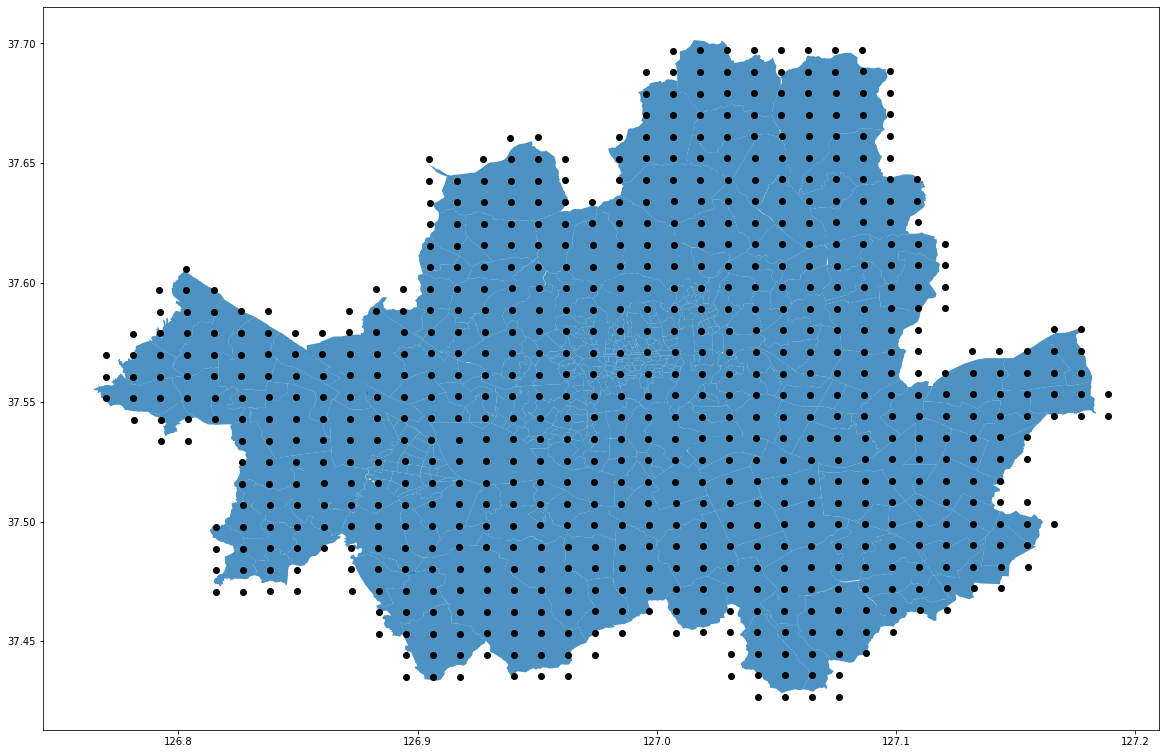

In [43]:
ax = df_map.plot(figsize=(20,20), alpha=0.8)
point_cent.plot(ax=ax, color='black', label='pop_point')
# ax.set_title("Seoul", fontsize=20)
# ax.set_axis_off()
# plt.legend()
plt.show()

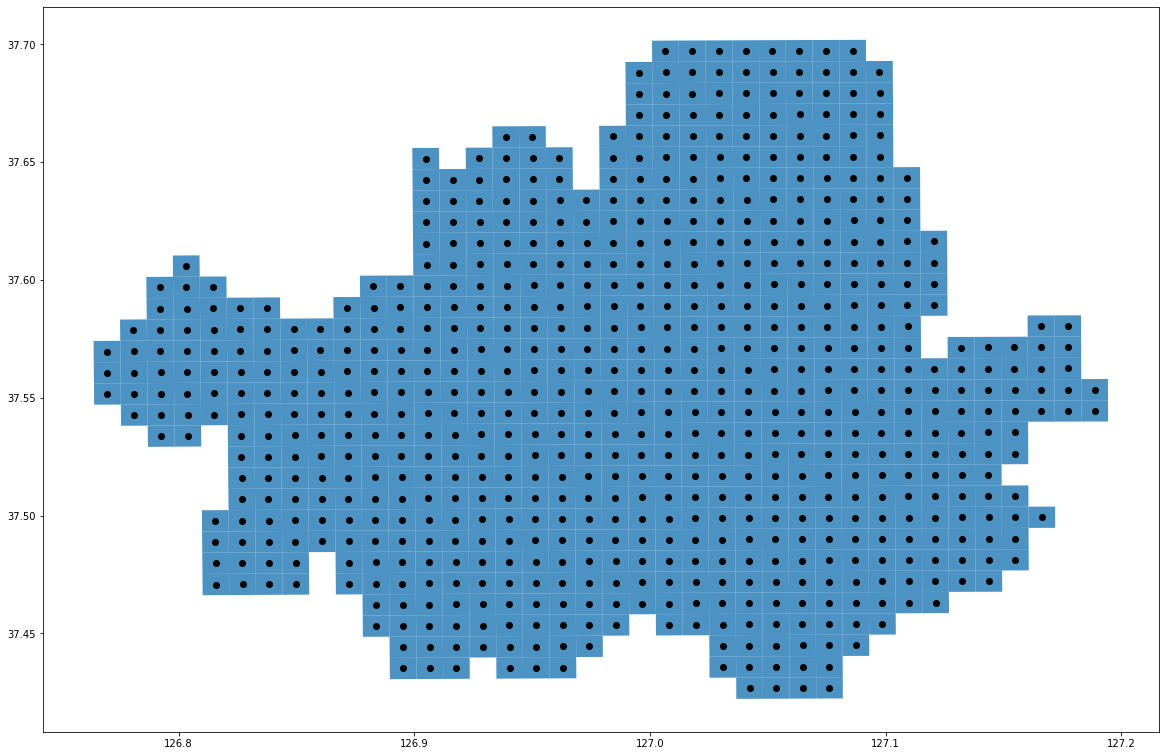

In [44]:
ax = df_reg['geometry'].plot(figsize=(20,20), alpha=0.8)
point_cent.plot(ax=ax, color='black', label='pop_point')
# ax.set_title("Seoul", fontsize=20)
# ax.set_axis_off()
# plt.legend()
plt.show()

###5. 기존 LPG 충전소 위치 분석
목적: 가중치 분석을 위한 y값 넣기

분석 데이터 종류


In [45]:
df_lpg = pd.read_csv('/content/drive/MyDrive/KDT/H2/01, Data/03, LPG 충전소 현황/전국_LPG충전소_현황_경도위도_WGS84.csv')

In [46]:
df_lpg

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
2036,제주 제주시,(주)천마와산충전소,제주 제주시 조천읍 와산리 1286,064-784-3205,용기+탱크+13kg용기,제주 제주시 조천읍 와산리 1286,126.678237,33.471562
2037,제주 제주시,정우오라엘피지충전소,제주 제주시 오라2동 1552-1외1필지,064-749-1123,자동차충전,제주 제주시 오라2동 1552-1외1필지,126.515456,33.482576
2038,제주 제주시,굿모닝엘피지충전소,제주 제주시 용담2동 1543,064-745-1151,자동차충전,제주 제주시 용담2동 1543,126.499206,33.504622
2039,제주 제주시,제주오케이충전소,"제주 제주시 이호2동 1580,1581,1582",064-749-5188,자동차충전,"제주 제주시 이호2동 1580,1581,1582",126.457233,33.495064


In [68]:
df_lpg = df_lpg[df_lpg['행정 구역'].str.contains('서울')]
df_lpg

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),02-352-4806,자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),126.921229,37.643674
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,02-2208-5151,자동차충전,서울 중랑구 신내동 317-7,127.098130,37.613902
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,02-434-0557,자동차충전,서울 중랑구 면목5동 169-6,127.079308,37.579608
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,02-435-2627,자동차충전,서울 중랑구 중화2동 208-11,127.075901,37.594187


In [69]:
from shapely.geometry import Polygon, Point

In [119]:
df_lpg_geo = []
for i in range(len(df_lpg)):
    df_lpg_geo.append([df_lpg.loc[i,'업소명'],Point(df_lpg.loc[i,'경도'],df_lpg.loc[i,'위도']).buffer(0.00582)])

In [120]:
df_lpg_geo = pd.DataFrame(df_lpg_geo)
df_lpg_geo.columns = ["업소명", "geometry"]

In [122]:
LPG_points = []
for i in tqdm(range(len(df_lpg_geo))):
    LPG_points.append(point_cent.buffer(0.00000001).within(df_lpg_geo.loc[i,'geometry']))
    
df_reg['LPG 충전소'] = 0

for i in range(len(LPG_points)):
    df_reg['LPG 충전소'][LPG_points[i]] = 1
    
df_reg

  0%|          | 0/79 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gid,geometry,coordinates,coord_cent,geo_cent,nomalized_pop,자동차등록,LPG 충전소
0,다사6453,"POLYGON ((127.09230 37.57567, 127.09225 37.584...","[[127.0923035430468, 37.57567440305103], [127....","[127.09794163380136, 37.58020043829302]",POINT (127.0979416338014 37.58020043829302),0.206811,37518,0
1,다사5651,"POLYGON ((127.00183 37.55730, 127.00177 37.566...","[[127.00182724968018, 37.55730030462514], [127...","[127.00745844605304, 37.561830628142914]",POINT (127.007458446053 37.56183062814291),0.275704,557,0
2,다사6157,"POLYGON ((127.05812 37.61161, 127.05806 37.620...","[[127.0581165973122, 37.61160520068249], [127....","[127.06375529184683, 37.61613284538466]",POINT (127.0637552918468 37.61613284538466),0.665257,23820,1
3,다사5858,"POLYGON ((127.02407 37.62049, 127.02401 37.629...","[[127.02406915802318, 37.62048620853416], [127...","[127.0297064357866, 37.625015464100706]",POINT (127.0297064357866 37.62501546410071),0.534796,33164,0
4,다사5347,"POLYGON ((126.96812 37.52110, 126.96805 37.530...","[[126.96811838272411, 37.52109923832573], [126...","[126.97374482409313, 37.52563116149439]",POINT (126.9737448240931 37.52563116149439),0.261969,1035,0
...,...,...,...,...,...,...,...,...
705,다사4053,"POLYGON ((126.82052 37.57442, 126.82044 37.583...","[[126.82051991631344, 37.57442288713654], [126...","[126.82614128007928, 37.57896175706814]",POINT (126.8261412800793 37.57896175706814),0.000000,23499,0
706,다사7249,"POLYGON ((127.18305 37.53990, 127.18302 37.548...","[[127.18305405081533, 37.539898769520654], [12...","[127.18869498499079, 37.544420511791216]",POINT (127.1886949849908 37.54442051179122),0.000000,0,0
707,다사4552,"POLYGON ((126.87722 37.56572, 126.87714 37.574...","[[126.87721510590382, 37.565722190145515], [12...","[126.88283930295496, 37.57025839209927]",POINT (126.882839302955 37.57025839209927),0.000000,11428,0
708,다사6265,"POLYGON ((127.06903 37.68375, 127.06898 37.692...","[[127.0690301996547, 37.683752563572355], [127...","[127.0746749769675, 37.688279668672436]",POINT (127.0746749769675 37.68827966867244),0.000000,60633,0


In [123]:
df_reg['LPG 충전소'].value_counts()

0    632
1     78
Name: LPG 충전소, dtype: int64

###6. LPG 충전소 위치선정에 대한 영향 요소 분석 및 상관관계 분석

분석 방법

고려되는 모든 변수들은 정규화 하였다.

선형회귀분석을 이용해 현재 제공받은 데이터로부터 LPG 충전소 위치에 영향을 주는 요소의 관계를 분석하였다.(Linear Regrssion)



분석 Input: (정규화된) 인구현황, 자동차 등록대수

분석 Output: 고려되는 요소들과 각 충전소 사이의 상관계수

In [145]:
df_reg

,gid,geometry,coordinates,coord_cent,geo_cent,nomalized_pop,자동차등록,LPG 충전소
0,다사6453,"POLYGON ((127.09230 37.57567, 127.09225 37.584...","[[127.0923035430468, 37.57567440305103], [127....","[127.09794163380136, 37.58020043829302]",POINT (127.0979416338014 37.58020043829302),0.206811,37518,0
1,다사5651,"POLYGON ((127.00183 37.55730, 127.00177 37.566...","[[127.00182724968018, 37.55730030462514], [127...","[127.00745844605304, 37.561830628142914]",POINT (127.007458446053 37.56183062814291),0.275704,557,0
2,다사6157,"POLYGON ((127.05812 37.61161, 127.05806 37.620...","[[127.0581165973122, 37.61160520068249], [127....","[127.06375529184683, 37.61613284538466]",POINT (127.0637552918468 37.61613284538466),0.665257,23820,1
3,다사5858,"POLYGON ((127.02407 37.62049, 127.02401 37.629...","[[127.02406915802318, 37.62048620853416], [127...","[127.0297064357866, 37.625015464100706]",POINT (127.0297064357866 37.62501546410071),0.534796,33164,0
4,다사5347,"POLYGON ((126.96812 37.52110, 126.96805 37.530...","[[126.96811838272411, 37.52109923832573], [126...","[126.97374482409313, 37.52563116149439]",POINT (126.9737448240931 37.52563116149439),0.261969,1035,0
...,...,...,...,...,...,...,...,...
705,다사4053,"POLYGON ((126.82052 37.57442, 126.82044 37.583...","[[126.82051991631344, 37.57442288713654], [126...","[126.82614128007928, 37.57896175706814]",POINT (126.8261412800793 37.57896175706814),0.000000,23499,0
706,다사7249,"POLYGON ((127.18305 37.53990, 127.18302 37.548...","[[127.18305405081533, 37.539898769520654], [12...","[127.18869498499079, 37.544420511791216]",POINT (127.1886949849908 37.54442051179122),0.000000,0,0
707,다사4552,"POLYGON ((126.87722 37.56572, 126.87714 37.574...","[[126.87721510590382, 37.565722190145515], [12...","[126.88283930295496, 37.57025839209927]",POINT (126.882839302955 37.57025839209927),0.000000,11428,0
708,다사6265,"POLYGON ((127.06903 37.68375, 127.06898 37.692...","[[127.0690301996547, 37.683752563572355], [127...","[127.0746749769675, 37.688279668672436]",POINT (127.0746749769675 37.68827966867244),0.000000,60633,0


In [146]:
df_reg['nomalized_car'] = df_reg['자동차등록'] / df_reg['자동차등록'].max()

In [147]:
df_reg.head()

,gid,geometry,coordinates,coord_cent,geo_cent,nomalized_pop,자동차등록,LPG 충전소,nomalized_car
0,다사6453,"POLYGON ((127.09230 37.57567, 127.09225 37.584...","[[127.0923035430468, 37.57567440305103], [127....","[127.09794163380136, 37.58020043829302]",POINT (127.0979416338014 37.58020043829302),0.206811,37518,0,0.579178
1,다사5651,"POLYGON ((127.00183 37.55730, 127.00177 37.566...","[[127.00182724968018, 37.55730030462514], [127...","[127.00745844605304, 37.561830628142914]",POINT (127.007458446053 37.56183062814291),0.275704,557,0,0.008599
2,다사6157,"POLYGON ((127.05812 37.61161, 127.05806 37.620...","[[127.0581165973122, 37.61160520068249], [127....","[127.06375529184683, 37.61613284538466]",POINT (127.0637552918468 37.61613284538466),0.665257,23820,1,0.367717
3,다사5858,"POLYGON ((127.02407 37.62049, 127.02401 37.629...","[[127.02406915802318, 37.62048620853416], [127...","[127.0297064357866, 37.625015464100706]",POINT (127.0297064357866 37.62501546410071),0.534796,33164,0,0.511964
4,다사5347,"POLYGON ((126.96812 37.52110, 126.96805 37.530...","[[126.96811838272411, 37.52109923832573], [126...","[126.97374482409313, 37.52563116149439]",POINT (126.9737448240931 37.52563116149439),0.261969,1035,0,0.015978


In [149]:
# 급속/ 완속 관련 objective function 만들기
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [150]:
X = df_reg[['nomalized_pop', 'nomalized_car']]
y = df_reg["LPG 충전소"]

In [151]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
LPG_coeff = regr.coef_
print('LPG 충전소 Intercept: ', regr.intercept_)
print('LPG Coefficients: \n', LPG_coeff)

LPG 충전소 Intercept:  0.05263054021176038
LPG Coefficients: 
 [0.18646826 0.00962363]


- 회기분석
- 제외시킬 지역 제거
  고려feature : 학교, 유치원, 기존 수소충전소
- MCLP

수소차 등록현황은.. 우째 적용할까?ㅠ 